In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Dataset/cardekho_dataset.csv')
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [2]:
#Basic inspection
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


((15411, 14), None)

In [3]:
#@title Column Summary
def column_summary(df):
    summary_data = []

    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()

        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })

    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Unnamed: 0,int64,0,15411,15411,"{19543: 1, 0: 1, 1: 1, 19523: 1, 19522: 1, 195..."
1,car_name,object,0,15411,121,"{'Hyundai i20': 906, 'Maruti Swift Dzire': 890..."
2,brand,object,0,15411,32,"{'Maruti': 4992, 'Hyundai': 2982, 'Honda': 148..."
3,model,object,0,15411,120,"{'i20': 906, 'Swift Dzire': 890, 'Swift': 781,..."
4,vehicle_age,int64,0,15411,24,"{4: 2252, 5: 2117, 3: 1926, 6: 1924, 7: 1438, ..."
5,km_driven,int64,0,15411,3688,"{50000: 553, 40000: 477, 70000: 466, 60000: 44..."
6,seller_type,object,0,15411,3,"{'Dealer': 9539, 'Individual': 5699, 'Trustmar..."
7,fuel_type,object,0,15411,5,"{'Petrol': 7643, 'Diesel': 7419, 'CNG': 301, '..."
8,transmission_type,object,0,15411,2,"{'Manual': 12225, 'Automatic': 3186}"
9,mileage,float64,0,15411,411,"{18.9: 632, 18.6: 404, 17.0: 339, 24.3: 292, 2..."


In [4]:
#@title Numeric Columns
# Select numeric columns (e.g., int64, float64)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['Unnamed: 0', 'vehicle_age', 'km_driven', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')


In [5]:
#@title Categorical colunms
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['car_name', 'brand', 'model', 'seller_type', 'fuel_type',
       'transmission_type'],
      dtype='object')


In [6]:
#@title Data Cleaning
# 1. Drop unnecessary index-like column
df_clean = df.drop(columns=["Unnamed: 0"])

# 2. Check for duplicate rows
duplicate_count = df_clean.duplicated().sum()

# 3. Check missing values explicitly
missing_values = df_clean.isnull().sum()

# 4. Basic statistical sanity check for numerical columns
numeric_summary = df_clean.describe()

duplicate_count, missing_values, numeric_summary

(np.int64(167),
 car_name             0
 brand                0
 model                0
 vehicle_age          0
 km_driven            0
 seller_type          0
 fuel_type            0
 transmission_type    0
 mileage              0
 engine               0
 max_power            0
 seats                0
 selling_price        0
 dtype: int64,
         vehicle_age     km_driven       mileage        engine     max_power  \
 count  15411.000000  1.541100e+04  15411.000000  15411.000000  15411.000000   
 mean       6.036338  5.561648e+04     19.701151   1486.057751    100.588254   
 std        3.013291  5.161855e+04      4.171265    521.106696     42.972979   
 min        0.000000  1.000000e+02      4.000000    793.000000     38.400000   
 25%        4.000000  3.000000e+04     17.000000   1197.000000     74.000000   
 50%        6.000000  5.000000e+04     19.670000   1248.000000     88.500000   
 75%        8.000000  7.000000e+04     22.700000   1582.000000    117.300000   
 max       29.000

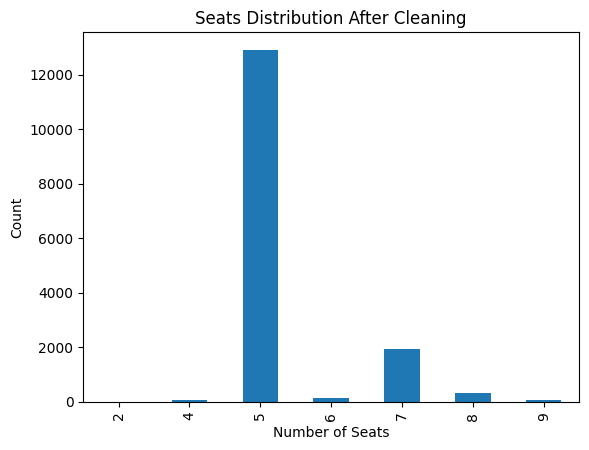

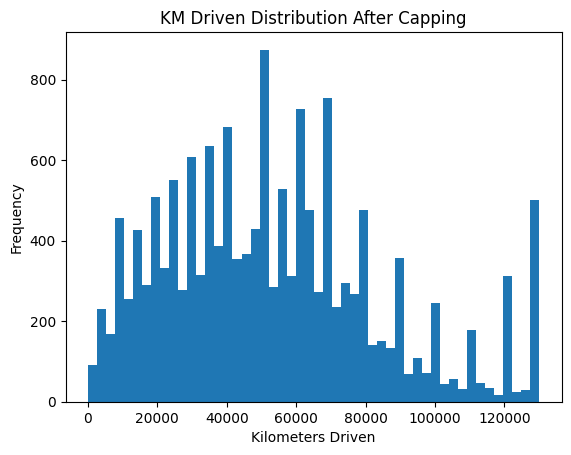

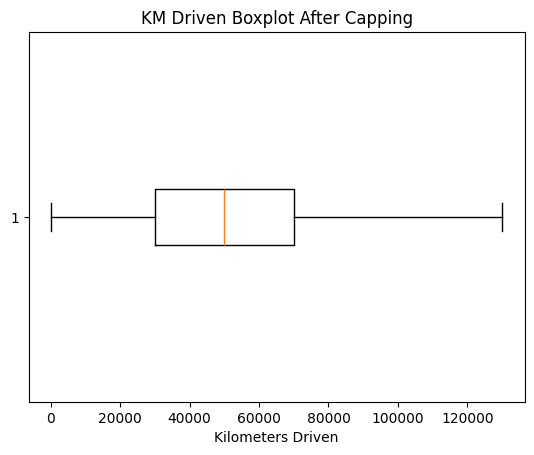

(15409, 14)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Remove duplicate rows
df = df.drop_duplicates()

# Remove invalid seats (seats == 0)
df = df[df["seats"] != 0]

# Cap km_driven using IQR upper bound
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df["km_driven"] = df["km_driven"].clip(upper=upper_bound)

# Dataset shape after cleaning
clean_shape = df.shape


# Seats distribution after cleaning
plt.figure()
df["seats"].value_counts().sort_index().plot(kind="bar")
plt.title("Seats Distribution After Cleaning")
plt.xlabel("Number of Seats")
plt.ylabel("Count")
plt.show()

# KM driven distribution after capping
plt.figure()
plt.hist(df["km_driven"], bins=50)
plt.title("KM Driven Distribution After Capping")
plt.xlabel("Kilometers Driven")
plt.ylabel("Frequency")
plt.show()

# Boxplot after capping
plt.figure()
plt.boxplot(df["km_driven"], vert=False)
plt.title("KM Driven Boxplot After Capping")
plt.xlabel("Kilometers Driven")
plt.show()

clean_shape


In [8]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# DROP REDUNDANT COLUMN
df.drop(columns=["car_name"], inplace=True)

#@title FEATURE ENGINEERING
# Car usage intensity
df["car_usage_per_year"] = df["km_driven"] / (df["vehicle_age"] + 1)

# Power efficiency
df["power_to_engine_ratio"] = df["max_power"] / df["engine"]


In [9]:
#@title Data Preparation
# TARGET & FEATURE SPLIT
X = df.drop(columns=["selling_price"])
y = df["selling_price"]

# TRAIN / TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# TARGET ENCODING (MODEL COLUMN)
# (TRAIN DATA ONLY — NO LEAKAGE)
model_target_mean = (
    X_train.assign(selling_price=y_train)
    .groupby("model")["selling_price"]
    .mean()
)

# Apply encoding
X_train["model_te"] = X_train["model"].map(model_target_mean)
X_test["model_te"] = X_test["model"].map(model_target_mean)

# Handle unseen models in test set
global_mean_price = y_train.mean()
X_test["model_te"].fillna(global_mean_price, inplace=True)

# Drop original model column
X_train.drop(columns=["model"], inplace=True)
X_test.drop(columns=["model"], inplace=True)

In [10]:
# ONE-HOT ENCODING
categorical_cols = [
    "seller_type",
    "fuel_type",
    "transmission_type",
    "brand"
]

numerical_cols = [
    col for col in X_train.columns
    if col not in categorical_cols
]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)

# Fit only on training data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# FINAL OUTPUT CHECK
print("Training shape:", X_train_encoded.shape)
print("Test shape:", X_test_encoded.shape)

Training shape: (12327, 52)
Test shape: (3082, 52)


In [11]:
#@title Feature scaling
from sklearn.preprocessing import StandardScaler

# StandardScaler for sparse matrices
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

print("Scaled training shape:", X_train_scaled.shape)
print("Scaled test shape:", X_test_scaled.shape)


Scaled training shape: (12327, 52)
Scaled test shape: (3082, 52)


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test):
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    return rmse, mae, r2


In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001, max_iter=5000, random_state=42)
lasso.fit(X_train_scaled, y_train)

lasso_metrics = evaluate_model(lasso, X_test_scaled, y_test)
print("Lasso (RMSE, MAE, R2):", lasso_metrics)


Lasso (RMSE, MAE, R2): (np.float64(386577.67429836025), 183490.03481148556, 0.7565865284788731)


In [14]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(
    alpha=0.001,
    l1_ratio=0.5,
    max_iter=5000,
    random_state=42
)

elastic.fit(X_train_scaled, y_train)

elastic_metrics = evaluate_model(elastic, X_test_scaled, y_test)
print("ElasticNet (RMSE, MAE, R2):", elastic_metrics)


ElasticNet (RMSE, MAE, R2): (np.float64(386365.8805848646), 183415.53436697304, 0.7568531725414887)


In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_encoded, y_train)

rf_metrics = evaluate_model(rf, X_test_encoded, y_test)
print("Random Forest (RMSE, MAE, R2):", rf_metrics)


Random Forest (RMSE, MAE, R2): (np.float64(211845.29869289655), 86957.37931512056, 0.9269014548743045)


In [16]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gbr.fit(X_train_encoded, y_train)

gbr_metrics = evaluate_model(gbr, X_test_encoded, y_test)
print("Gradient Boosting (RMSE, MAE, R2):", gbr_metrics)


Gradient Boosting (RMSE, MAE, R2): (np.float64(208648.005555534), 91177.86214305433, 0.9290912960243647)


In [19]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train_encoded, y_train)

xgb_metrics = evaluate_model(xgb, X_test_encoded, y_test)
print("XGBoost (RMSE, MAE, R2):", xgb_metrics)


XGBoost (RMSE, MAE, R2): (np.float64(199658.6860419551), 83434.1328125, 0.9350696802139282)


In [20]:
results = pd.DataFrame({
    "Model": [
        "Lasso",
        "ElasticNet",
        "Random Forest",
        "Gradient Boosting",
        "XGBoost"
    ],
    "RMSE": [
        lasso_metrics[0],
        elastic_metrics[0],
        rf_metrics[0],
        gbr_metrics[0],
        xgb_metrics[0]
    ],
    "MAE": [
        lasso_metrics[1],
        elastic_metrics[1],
        rf_metrics[1],
        gbr_metrics[1],
        xgb_metrics[1]
    ],
    "R2": [
        lasso_metrics[2],
        elastic_metrics[2],
        rf_metrics[2],
        gbr_metrics[2],
        xgb_metrics[2]
    ]
})

results.sort_values(by="RMSE")


,Model,RMSE,MAE,R2
4,XGBoost,199658.686042,83434.132812,0.935070
3,Gradient Boosting,208648.005556,91177.862143,0.929091
2,Random Forest,211845.298693,86957.379315,0.926901
1,ElasticNet,386365.880585,183415.534367,0.756853
0,Lasso,386577.674298,183490.034811,0.756587
